In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np 
import pandas as pd 
import os
import os
import zipfile
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

2024-05-06 11:17:27.048382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 11:17:27.048507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 11:17:27.136147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
a=[]
b=[]
with open('../input/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
F.close() 
os.mkdir('./Training')

In [3]:
parent_dir="./Training"
directory1 = "Abnormal" 
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [4]:
save_path = './Training/Abnormal'
for filename in a:
  shutil.copy('../input/retinal-disease-classification/Training_Set/Training_Set/Training/'+filename,save_path)
save_path = './Training/Normal'
for filename in b:
  shutil.copy('../input/retinal-disease-classification/Training_Set/Training_Set/Training/'+filename,save_path)

In [5]:
a=[]
b=[]
with open('../input/retinal-disease-classification/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
F.close() 
os.mkdir('./Validation')

In [6]:
parent_dir="./Validation"
directory1 = "Abnormal" 
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [7]:
save_path = './Validation/Abnormal'
for filename in a:
  shutil.copy('../input/retinal-disease-classification/Evaluation_Set/Evaluation_Set/Validation/'+filename,save_path)
save_path = './Validation/Normal'
for filename in b:
  shutil.copy('../input/retinal-disease-classification/Evaluation_Set/Evaluation_Set/Validation/'+filename,save_path)

In [8]:
a=[]
b=[]
with open('../input/retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv','r') as F:
  reader=csv.reader(F)
  for row in reader:
      if(row[1]=='1'):
        a.append(row[0]+'.png')
      if(row[1]=='0'):
        b.append(row[0]+'.png')
F.close() 
os.mkdir('./Testing')

In [9]:
parent_dir="./Testing"
directory1 = "Abnormal" 
directory2 = "Normal"
path1 = os.path.join(parent_dir, directory1)
path2 = os.path.join(parent_dir, directory2)
os.mkdir(path1)
os.mkdir(path2)

In [10]:
save_path = './Testing/Abnormal'
for filename in a:
  shutil.copy('../input/retinal-disease-classification/Test_Set/Test_Set/Test/'+filename,save_path)
save_path = './Testing/Normal'
for filename in b:
  shutil.copy('../input/retinal-disease-classification/Test_Set/Test_Set/Test/'+filename,save_path)

In [11]:
train_abnormal_dir = os.path.join('./Training/Abnormal')
train_normal_dir = os.path.join('./Training/Normal')
train_abnormal_names = os.listdir(train_abnormal_dir)
train_normal_names = os.listdir(train_normal_dir)
print('total training images with abnormalities:', len(os.listdir(train_abnormal_dir)))
print('total training images of normal eyes:', len(os.listdir(train_normal_dir)))

total training images with abnormalities: 1519
total training images of normal eyes: 401


In [12]:
validation_abnormal_dir = os.path.join('./Validation/Abnormal')
validation_normal_dir = os.path.join('./Validation/Normal')
validation_abnormal_names = os.listdir(validation_abnormal_dir)
validation_normal_names = os.listdir(validation_normal_dir)
print('total validation images with abnormalities:', len(os.listdir(validation_abnormal_dir)))
print('total validation images of normal eyes:', len(os.listdir(validation_normal_dir)))

total validation images with abnormalities: 506
total validation images of normal eyes: 134


In [13]:
test_abnormal_dir = os.path.join('./Testing/Abnormal')
test_normal_dir = os.path.join('./Testing/Normal')
test_abnormal_names = os.listdir(test_abnormal_dir)
test_normal_names = os.listdir(test_normal_dir)
print('total testing images with abnormalities:', len(os.listdir(test_abnormal_dir)))
print('total testing images of normal eyes:', len(os.listdir(test_normal_dir)))

total testing images with abnormalities: 506
total testing images of normal eyes: 134


In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                    rotation_range = 30,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.1,
                                    horizontal_flip = True
                                   )
train_generator = train_datagen.flow_from_directory('./Training', 
                                                    target_size=(150,150), 
                                                    class_mode='binary')

Found 1920 images belonging to 2 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory('./Validation', 
                                                              target_size=(150,150),
                                                              class_mode='binary')

Found 640 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory('./Testing', 
                                                              target_size=(150,150),
                                                              class_mode='binary')

Found 640 images belonging to 2 classes.


In [17]:
from tensorflow.keras.applications import EfficientNetB0
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.applications import ResNet50

In [18]:
model = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
for layer in model.layers:
    layer.trainable = False

In [21]:
x = model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

In [22]:
m = Model(inputs=model.input, outputs=predictions)
m.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105,345 (88.14 MB)

 Trainable params: 8,390,657 (32.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
m.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [24]:
results = m.fit(train_generator,epochs=10,
                              steps_per_epoch=10,
                              validation_data=validation_generator,
                             validation_steps=5)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/10 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3984 - loss: 1.0604 

I0000 00:00:1714994442.803315     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714994442.830033     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6435 - loss: 0.8254

W0000 00:00:1714994487.500279     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step - accuracy: 0.6515 - loss: 0.8132 - val_accuracy: 0.7563 - val_loss: 0.6478
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.7447 - loss: 0.5330 - val_accuracy: 0.8062 - val_loss: 0.6550
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8368 - loss: 0.4761 - val_accuracy: 0.7812 - val_loss: 0.4524
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7430 - loss: 0.5847 - val_accuracy: 0.7563 - val_loss: 0.5381
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7794 - loss: 0.5292 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.7845 - loss: 0.5042 - val_accuracy: 0.8375 - val_loss: 0.4050
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4323
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8340 - loss: 0.4050 - val_accuracy: 0.8813 - val_loss: 0.4091
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.7656 - loss: 0.5558 - val_accuracy: 0.7500 - val_loss: 0.6251
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.8082 - loss: 0.4596 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [25]:
# m.evaluate(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8297 - loss: 0.4319


[0.4157017171382904, 0.8421875238418579]

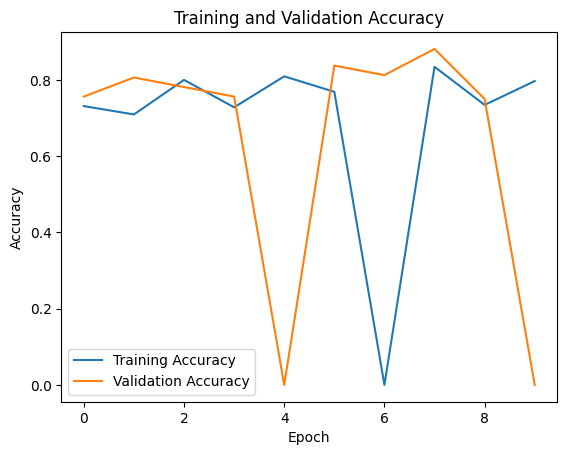

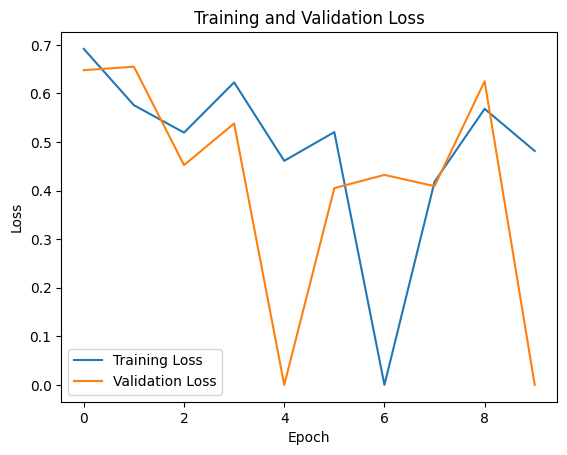

20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8316 - loss: 0.4125
Test Loss: 0.4157017171382904
Test Accuracy: 0.8421875238418579
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step
Confusion Matrix:
[[388 118]
 [ 99  35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       506
           1       0.23      0.26      0.24       134

    accuracy                           0.66       640
   macro avg       0.51      0.51      0.51       640
weighted avg       0.68      0.66      0.67       640



In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot training and validation accuracy
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model on testing data
test_loss, test_acc = m.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions for testing data
predictions = m.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions > 0.5

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
print('Classification Report:')
print(classification_report(y_true, y_pred))


In [27]:
m.save('/kaggle/working/your_model.h5')

In [28]:
!ls

Testing  Training  Validation  your_model.h5


In [29]:
from IPython.display import FileLink
FileLink(r'your_model.h5')

/kaggle/working/your_model.h5